# Camera

## Calibration

In [ ]:
import glob
import cv2
import numpy as np
from skimage import data, io

In [116]:
board_size = (7, 5)

# data.checkerboard()

In [117]:
def get_corners(w, h):
    '''get_corners
    '''
    # x, y, z, row first
    pworld = np.zeros((h, w, 3), dtype=np.float32) 
    grid_x, grid_y = np.meshgrid(range(w), range(h))

    pworld[:, :, 0] = grid_x
    pworld[:, :, 1] = grid_y

    return pworld.reshape(-1, 3)

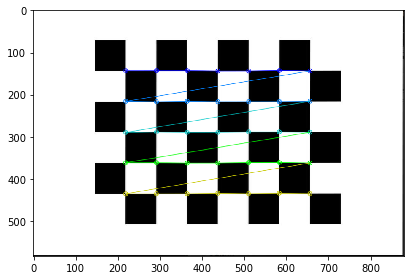

In [118]:
points_world = []
points_pixel = []
criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 30, 0.001)

for path in glob.glob('./*.jpg'):
    
    im = cv2.imread(path)
    im_size = im.shape
    
    im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    
    io.imshow(im_gray)
    
    r, corners = cv2.findChessboardCorners(im_gray, board_size, None)
    
    if r:
        points_world.append(get_corners(*board_size))
        
        corners = cv2.cornerSubPix(im_gray, corners, winSize=(11, 11), zeroZone=(-1, -1), criteria=criteria)
        
        points_pixel.append(corners)
        
        im = cv2.drawChessboardCorners(im, board_size, corners, r)
        io.imshow(im)
        
        
r, matx, dist, rvec, tvec = cv2.calibrateCamera(points_world, points_pixel, board_size, None, None)


matx_new, (x, y, w, h) = cv2.getOptimalNewCameraMatrix(matx, dist, im_size[:-1][::-1], 1, im_size[:-1][::-1])

im_dist = cv2.undistort(im, matx, dist, None, matx_new)

io.imshow(im_dist)

## Camera

In [142]:
import copy
import numpy as np

import torch

class Camera(object):
    '''Camera
    '''
    def __init__(self, m):
        self._m = copy.deepcopy(m)
        
        
    def to(self, device):
        pass
    
        
    @property
    def K(self, ):
        return self._m
    
    @property
    def K_inv(self, ):
        '''K inv
        '''
        if isinstance(self._m, np.ndarray):
            return np.linalg.pinv(self._m)
        elif isinstance(self._m, torch.Tensor):
            return torch.linalg.pinv(self._m)    
        else:
            pass
        
    @classmethod
    def calibration(cls, boards, board_size=(7, 5)):
        raise NotImplementedError('')

    def undistort(self, imgs):
        raise NotImplementedError('')



class Transform(object):
    '''Transform
    '''
    @staticmethod
    def rotx(t):
        ''' 3D Rotation about the x-axis. '''
        c = np.cos(t)
        s = np.sin(t)
        return np.array([[1,  0,  0],
                         [0,  c, -s],
                         [0,  s,  c]])

    @staticmethod
    def roty(t):
        ''' Rotation about the y-axis. '''
        c = np.cos(t)
        s = np.sin(t)
        return np.array([[c,  0,  s],
                         [0,  1,  0],
                         [-s, 0,  c]])

    @staticmethod
    def rotz(t):
        ''' Rotation about the z-axis. '''
        c = np.cos(t)
        s = np.sin(t)
        return np.array([[c, -s,  0],
                         [s,  c,  0],
                         [0,  0,  1]])


    
class Box3dCameraCoord(object):
    '''
       z (front)
      /
     /
    O —— —— x (right) 
    |
    |
    y(down)
    
    bboxes, [n, m], (x, y, z, l(x), h(y), w(z), rotation_y, ), by default m == 7,
    origin, default bottom plane center (x, y, z) (kitti)
    '''
    def __init__(self, bboxes, origin=(0.5, 1.0, 0.5)):
        self.bboxes = bboxes
        
    
    def to(self, device):
        pass

    
    @property
    def corners(self, ):
        pass
    
    
    def rotate(self, angle, ):
        pass
    
    
    

In [143]:
# https://github.com/danielhavir/voxelize3d

# https://github.com/yeyang1021/KITTI_VIZ_3D